# Backtesting 

In [9]:
import pandas as pd
import numpy as np

import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt

import logging
import coloredlogs

from trading_bot.utils import show_eval_result, switch_k_backend_device, get_stock_data
from trading_bot.methods import evaluate_model
from trading_bot.agent import Agent

import warnings

# Turn off all warnings
warnings.filterwarnings('ignore')

### Load Models & Data

In [2]:
model_name = 'model_dqn_GOOG_50'
test_stock = 'data/GOOG_2019.csv'
window_size = 10
debug = True

agent = Agent(window_size, pretrained=True, model_name=model_name)

In [3]:
df = pd.read_csv(test_stock)
df = df[['Date', 'Adj Close']]
df = df.rename(columns={'Adj Close': 'actual', 'Date': 'date'})

df['date'] = pd.to_datetime(df['date'])

df.head()

,date,actual
0,2019-01-02,1045.849976
1,2019-01-03,1016.059998
2,2019-01-04,1070.709961
3,2019-01-07,1068.390015
4,2019-01-08,1076.280029


### Backtesting 

In [10]:
coloredlogs.install(level='DEBUG')
switch_k_backend_device()

test_data = get_stock_data(test_stock)
initial_offset = test_data[1] - test_data[0]

test_result, history = evaluate_model(agent, test_data, window_size)
show_eval_result(model_name, test_result, initial_offset)

2024-03-12 14:06:24 Dessas-MacBook-Pro.local root[4202] DEBUG switching to TensorFlow for CPU


1/1 [==============================] - 0s 113ms/step


2024-03-12 14:06:39 Dessas-MacBook-Pro.local root[4202] INFO model_dqn_GOOG_50: +$1141.45



### Plot Trading Oppotunities 

In [11]:
def plot_buy_sell(df, history, title="trading session"):

    plt.plot(df['date'], df['actual'], label = 'Stock Price', alpha = 0.6,color = 'royalblue') 
    print(df.columns)

    buy_dates = df.iloc[[i for i, (_, a) in enumerate(history) if a == 'BUY']]  
    sell_dates = df.iloc[[i for i, (_, a) in enumerate(history) if a == 'SELL']]  

    plt.scatter(buy_dates['date'], buy_dates['actual'], s = 8, label = 'Buy', color = 'limegreen')
    plt.scatter(sell_dates['date'], sell_dates['actual'], s = 8, label = 'Sell', color = 'crimson')
    
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Stock Price $")
    plt.legend()
    plt.savefig('figures/GOOG_trading.png')
    
    plt.show() 

2024-03-12 14:05:03 Dessas-MacBook-Pro.local matplotlib.pyplot[4202] DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-12 14:05:03 Dessas-MacBook-Pro.local matplotlib.pyplot[4202] DEBUG Loaded backend module://matplotlib_inline.backend_inline version unknown.
2024-03-12 14:05:03 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2024-03-12 14:05:03 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/Users/dominicdootson/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/fonts/ttf/cmmi10.ttf', name='cmmi10', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-12 14:05:03 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/Users/dominicdootson/anaconda3/lib/python3.11/site-packages/matplotlib/mpl-data/font

Index(['date', 'actual'], dtype='object')


2024-03-12 14:05:04 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/System/Library/Fonts/SFNSDisplay-UltralightItalic.otf', name='System Font', style='italic', variant='normal', weight=100, stretch='normal', size='scalable')) = 11.335
2024-03-12 14:05:04 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/Library/Fonts/Impact.ttf', name='Impact', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
2024-03-12 14:05:04 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/System/Library/Fonts/AquaKana.ttc', name='.Aqua Kana', style='normal', variant='normal', weight=300, stretch='normal', size='scalable')) = 10.145
2024-03-12 14:05:04 Dessas-MacBook-Pro.local matplotlib.font_manager[4202] DEBUG findfont: score(FontEntry(fname='/System/Library/Fonts/ヒラギノ角ゴシック W2.ttc', name='Hiragino Sans', style='normal', variant='normal

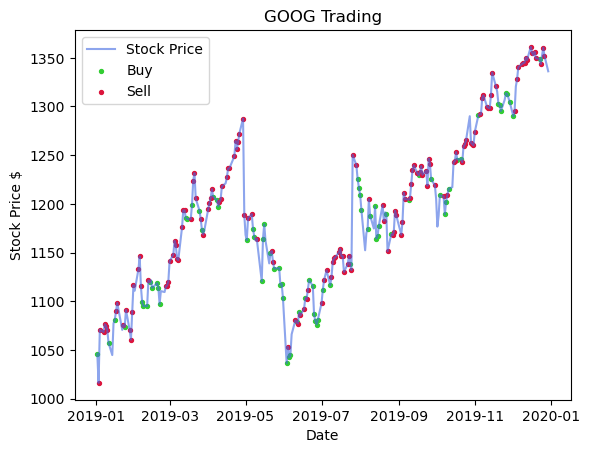

In [6]:
plot_buy_sell(df, history, title="GOOG Trading");


In [7]:
buy_prices = [p for p, a in history if a == 'BUY']
sell_prices = [p for p, a in history if a == 'SELL']
profit = [s-b for s, b in zip(sell_prices, buy_prices)]

In [8]:
print(f"Number of profitable trades: {np.round(sum((100 for p in profit if p>0))/len(profit),1)}%")
print(f"Annual Returns: {np.round(100*(sum(profit)-buy_prices[0])/buy_prices[0], 1)}%")

Number of profitable trades: 39.0%
Annual Returns: -206.9%
